<h1 align=center><font size = 8><strong>Exemplo regressão linear univariada</strong></font></h1>

# Imports

In [33]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Pré-processamento

In [34]:
data = np.loadtxt("dataset_regressao01.txt", dtype = float, delimiter = ',')

In [35]:
X = data[:,0]
Y = data[:,1]

In [36]:
X[0:10]

array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781,
       6.4862, 5.0546])

In [37]:
Y[0:10]

array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233, 11.886 ,  4.3483,
       12.    ,  6.5987,  3.8166])

In [38]:
# Visualização dos dados

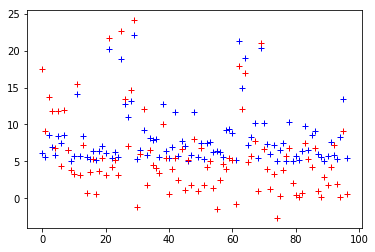

In [39]:
plt.plot(X,"b+")
plt.plot(Y,"r+")
plt.show()

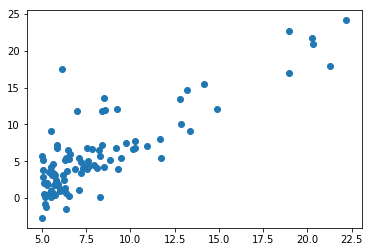

In [40]:
plt.scatter(X,Y)
plt.show()

In [41]:
x = np.ones((data.shape[0],2))
x[:,1] = X
y = Y

In [42]:
x[:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

# Separando os labels em conjuntos de treino e teste

In [43]:
X_train = x[:-20]
X_test =  x[-20:]
y_train = y[:-20]
y_test = y[-20:]

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((77, 2), (77,), (20, 2), (20,))

# Definindo pesos

In [45]:
w = np.zeros((2,1))
print(w[0])
print(len(w))

[0.]
2


# Setando parâmetros

In [46]:

learning_rate = 0.0005
n_epochs = 1000
n = X_train.shape[0]
eqm = []

# Rodando o modelo iterativamente

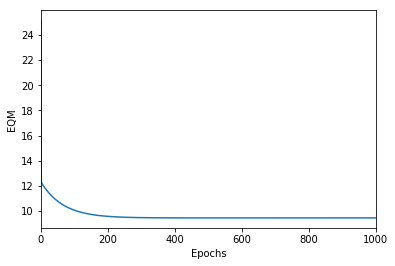

In [47]:
for i in range(n_epochs):
    ind = np.random.permutation(n)
    x = X_train[ind,:]
    y = y_train[ind]
    erro_total = 0
    for j in range(n):
        y_barra = np.matmul(X_train[j,:],w)
        erro = y_train[j] - y_barra[0]
        erro_total = erro_total + ((erro*erro))
        w[0] = w[0] + (learning_rate*erro)
        w[1] = w[1] + (learning_rate*erro*X_train[j,1])
    eqm.append(erro_total/float(n))
    
eixo_x = range(0,n_epochs)

plt.plot(eixo_x,eqm)
plt.ylabel("EQM")
plt.xlim((0,n_epochs))
plt.xlabel("Epochs")
plt.show()

# Obtendo pesos finais, calculando o y predito e o erro quadrado médio

In [48]:
# exibindo os pesos finais
a,b = w[0],w[1]
print(a)
print(b)

[-3.74535175]
[1.08438635]


In [49]:
# calculando y_pred e exibindo
y_pred = (b*X_test[:,1])+a
print(y_pred)

[ 1.71616012  7.39563363  1.79336842  2.46731454  1.8808784   3.14668259
  6.84769321  3.32040128  5.49058369  6.20953184  2.76313514  2.24089467
  1.74099256  2.44400024  4.53567307  2.62075521  2.00775161  5.24789803
 10.77891905  2.15034841]


In [50]:
# calculando erro quadrado médio e exibindo
mse = np.mean((y_test - y_pred)**2)
print(mse)

4.869262571080745


In [51]:
eqm[-1]

9.463515349774758

----------------------------------------------

<h1 align=center><font size = 8><strong>Exemplo regressão linear univariada com Scikit Learn</strong></font></h1>


<a href="https://scikit-learn.org/stable/"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/260px-Scikit_learn_logo_small.svg.png" width = 250, align = "center"></a>

# Imports

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Pré-processamento

In [27]:
data = np.loadtxt("dataset_regressao01.txt", dtype = float, delimiter = ',')

In [28]:
X = data[:,0]
Y = data[:,1]

In [29]:
print("Shape de x:",X.shape)
print("Shape de y:",Y.shape)

Shape de x: (97,)
Shape de y: (97,)


# Separando os conjuntos de treino e teste

In [31]:
X_train = X[:-20]
X_test =  X[-20:]
y_train = Y[:-20]
y_test = Y[-20:]

In [ ]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

# Usando Scikit-Learn

In [ ]:
# regr vai ser nosso objeto da regressão linear
regr = linear_model.LinearRegression()

In [ ]:
# Vamos agora dar o "fit" para treinar com os conjuntos de treino 
regr.fit(X_train, y_train)

In [ ]:
# Usar o .predict para extrair as prediçoes usando o conjunto de teste
y_pred = regr.predict(X_test)

In [ ]:
# Coeficiente
print('Coefficients: \n', regr.intercept_, regr.coef_)

In [ ]:
# Erro médio quadrado
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

In [ ]:
# Imprimir saídas
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

--------------------------------

<h1 align=center><font size = 8><strong>Exemplo regressão linear multivariada</strong></font></h1>

# Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline

# Pre-processamento

In [5]:
data = np.loadtxt("dataset_regressao02.txt", dtype = float)

In [6]:
data[:10,:]

array([[2.104  , 3.     , 3.999  ],
       [1.6    , 3.     , 3.299  ],
       [2.4    , 3.     , 3.69   ],
       [1.416  , 2.     , 2.32   ],
       [3.     , 4.     , 5.399  ],
       [1.985  , 4.     , 2.999  ],
       [1.534  , 3.     , 3.149  ],
       [1.427  , 3.     , 1.98999],
       [1.38   , 3.     , 2.12   ],
       [1.494  , 3.     , 2.425  ]])

In [7]:
var = data[:,0:2]
Y = data[:,2]

In [8]:
x = np.ones((data.shape[0],data.shape[1]))

In [9]:
x[:,1:3] = var
y = Y

In [10]:
print(x[:10,:])
print(y[:10])

[[1.    2.104 3.   ]
 [1.    1.6   3.   ]
 [1.    2.4   3.   ]
 [1.    1.416 2.   ]
 [1.    3.    4.   ]
 [1.    1.985 4.   ]
 [1.    1.534 3.   ]
 [1.    1.427 3.   ]
 [1.    1.38  3.   ]
 [1.    1.494 3.   ]]
[3.999   3.299   3.69    2.32    5.399   2.999   3.149   1.98999 2.12
 2.425  ]


# Dividindo treino e teste

In [11]:
X_train = x[:-20]
X_test =  x[-20:]

In [12]:
y_train = y[:-20]
y_test = y[-20:]

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27, 3), (27,), (20, 3), (20,))

# Aplicação da fórmula fechada dos mínimos quadrados

In [14]:
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [15]:
w.shape

(3,)

In [16]:
# Criaremos a variável "wish" pois nela teremos o shape desejado e faremos a conversão de "w" para "wish"
wish = np.zeros((3,1))

In [17]:
wish[:,0] = w

In [18]:
wish.shape

(3, 1)

In [19]:
print(wish)

[[0.31679814]
 [1.43620754]
 [0.08517081]]


# Obtenção do y-predito

In [20]:
y_predict = (X_test).dot(wish)

In [21]:
y_predict.shape, y_test.shape

((20, 1), (20,))

In [22]:
y_predict = np.reshape(y_predict,(20))

In [23]:
y_predict.shape

(20,)

# Cálculo do erro quadrado médio

In [24]:
mse = np.mean((y_test - y_predict)**2)

In [25]:
mse

0.4739542362770156

----------------------------



<h1 align=center><font size = 8><strong>Exemplo regressão linear multivariada com scikit learn</strong></font></h1>

<a href="https://scikit-learn.org/stable/"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/260px-Scikit_learn_logo_small.svg.png" width = 250, align = "center"></a>

Métricas:
    - mean squared error:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Pré-processamento

In [ ]:
data = np.loadtxt("dataset_regressao02.txt", dtype = float)

In [ ]:
X = data[:,0:2]
Y = data[:,2]

In [ ]:
print("Shape de x:",X.shape)
print("Shape de y:",Y.shape)

# Separando em conjuntos de treino e de teste


In [ ]:
X_train = X[:-20]
X_test =  X[-20:]
y_train = y[:-20]
y_test = y[-20:]

# Usando Scikit Learn para rodar nosso experimento

In [ ]:
# regr vai ser nosso objeto da regressão linear
regr = linear_model.LinearRegression()

In [ ]:
# Vamos agora dar o "fit" para treinar com os conjuntos de treino 
regr.fit(X_train, y_train)

In [ ]:
# Usar o .predict para extrair as prediçoes usando o conjunto de teste
y_pred = regr.predict(X_test)

In [ ]:
# Coeficiente
print('Coefficients: \n', regr.coef_, regr.intercept_)

In [ ]:
# Erro médio quadrado
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

-------------------------------

<h1 align=center><font size = 8><strong>Exemplo regressão linear univariada usando tensorflow</strong></font></h1>

<a href="https://www.tensorflow.org/?hl=pt-br"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1280px-TensorFlowLogo.svg.png" width = 200, align = "center"></a>

## Imports

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Pré-processamento

In [73]:
data = np.loadtxt("dataset_regressao01.txt", dtype = float, delimiter = ',')

In [74]:
X = data[:,0]
Y = data[:,1]

In [75]:
X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

# Dividindo conjuntos de treino e teste

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

## Definindo hiper-parâmetros

In [77]:
learning_rate = 0.00005
n_epochs = 10000

## Reset nas configurações do grafo de execução

In [78]:
tf.reset_default_graph()

## Setando Grafo

In [79]:
X = tf.constant( X_train, dtype = tf.float32 ,name = "X")
y = tf.constant(y_train, dtype = tf.float32,name = "y")


In [80]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

In [81]:
y_pred = tf.add(tf.multiply(X,W), b)

In [82]:
loss = tf.losses.mean_squared_error(y,y_pred)

In [83]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [84]:
init = tf.global_variables_initializer()

# Rodando grafo

In [85]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        sess.run(optimizer)
        if (epoch+1) % 1000 == 0:
            c = sess.run(loss)
            print("Epoch:", (epoch+1), "cost =", c)
    w_final, b_final = sess.run([W,b])

Epoch: 100 cost = 43.217
Epoch: 200 cost = 42.663338
Epoch: 300 cost = 42.117
Epoch: 400 cost = 41.57784
Epoch: 500 cost = 41.045746
Epoch: 600 cost = 40.520584
Epoch: 700 cost = 40.002243
Epoch: 800 cost = 39.4906
Epoch: 900 cost = 38.985542
Epoch: 1000 cost = 38.486973
Epoch: 1100 cost = 37.99477
Epoch: 1200 cost = 37.508854
Epoch: 1300 cost = 37.029118
Epoch: 1400 cost = 36.555466
Epoch: 1500 cost = 36.08782
Epoch: 1600 cost = 35.626087
Epoch: 1700 cost = 35.17018
Epoch: 1800 cost = 34.72003
Epoch: 1900 cost = 34.275574
Epoch: 2000 cost = 33.836716
Epoch: 2100 cost = 33.403385
Epoch: 2200 cost = 32.97553
Epoch: 2300 cost = 32.55308
Epoch: 2400 cost = 32.135994
Epoch: 2500 cost = 31.724182
Epoch: 2600 cost = 31.317621
Epoch: 2700 cost = 30.916235
Epoch: 2800 cost = 30.519978
Epoch: 2900 cost = 30.12882
Epoch: 3000 cost = 29.7427
Epoch: 3100 cost = 29.361576
Epoch: 3200 cost = 28.985409
Epoch: 3300 cost = 28.614168
Epoch: 3400 cost = 28.247799
Epoch: 3500 cost = 27.886272
Epoch: 3600 

In [86]:
print(w_final)
print(b_final)

0.70387006
-0.2884551


In [87]:
# calculando y_pred e exibindo
y_pred = (w_final*X_test[:])+b_final
print(y_pred)

[[ 3.44747601]
 [ 3.49794349]
 [ 3.62851139]
 [ 4.55593058]
 [ 4.27698687]
 [ 5.21911694]
 [ 8.74079001]
 [ 4.32041565]
 [14.02896575]
 [ 5.92347971]
 [ 3.35709909]
 [ 4.973959  ]
 [ 4.06786708]
 [ 3.60232742]
 [ 3.44585711]
 [ 7.95245554]
 [ 6.26471592]
 [ 3.65765161]
 [ 5.06313934]
 [ 3.68186474]]


In [88]:
# calculando erro quadrado médio e exibindo
mse = np.mean((y_test - y_pred)**2)
print(mse)

8.519464928973376


---------------------

<h1 align=center><font size = 8><strong>Exemplo regressão linear multivariada usando tensorflow</strong></font></h1>

<a href="https://www.tensorflow.org/?hl=pt-br"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1280px-TensorFlowLogo.svg.png" width = 200, align = "center"></a>

# Imports

In [184]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Pré-processamento

In [185]:
data = np.loadtxt("dataset_regressao02.txt", dtype = float)

In [186]:
X = data[:,0:2]
Y = data[:,2]

In [187]:
print("Shape de x:",X.shape)
print("Shape de y:",Y.shape)

Shape de x: (47, 2)
Shape de y: (47,)


# Dividindo os conjuntos em treino e teste

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# Definindo parâmetros

In [189]:
learning_rate = 0.001
n_epochs = 7000

# Definindo grado de execução

In [190]:
tf.reset_default_graph()

In [191]:
X1 = tf.constant( X_train[:,0], dtype = tf.float32 ,name = "X1")
X2 = tf.constant( X_train[:,1], dtype = tf.float32 ,name = "X2")
y = tf.constant(y_train, dtype = tf.float32,name = "y")

In [192]:
W1 = tf.Variable(np.random.randn(), name = "W1")
W2 = tf.Variable(np.random.randn(), name = "W2")
b = tf.Variable(np.random.randn(), name = "b") 

In [193]:
type(X1)

tensorflow.python.framework.ops.Tensor

In [194]:
type(W2)

tensorflow.python.ops.variables.RefVariable

In [195]:
termo1 = tf.multiply(X1,W1)

In [196]:
termo2 = tf.multiply(X2,W2)

In [197]:
y_pred = tf.add(tf.add(termo1,termo2),b)

In [198]:
loss = tf.losses.mean_squared_error(y,y_pred)

In [199]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [200]:
init = tf.global_variables_initializer()

# Rodando grafo de execução

In [201]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        sess.run(optimizer)
        if (epoch+1) % 1000 == 0:
            c = sess.run(loss)
            print("Epoch:", (epoch+1), "cost =", c)
    w1_final, w2_final, b_final = sess.run([W1, W2, b])

Epoch: 1000 cost = 3.1640115
Epoch: 2000 cost = 2.2402487
Epoch: 3000 cost = 1.8899902
Epoch: 4000 cost = 1.4699019
Epoch: 5000 cost = 1.0603544
Epoch: 6000 cost = 0.74622375
Epoch: 7000 cost = 0.5583956


In [211]:
print(w1_final)
print(w2_final)
print(b_final)

1.1029704
0.36667094
-0.011346149


In [212]:
y_pred = (w1_final*X_test[:,0])+(w2_final*X_test[:,1])+b_final
print(y_pred)

[2.30193406 2.85783112 2.45193803 2.80440377 2.67363507 4.33298727
 2.66260537 3.99216943 3.87476979 2.78062319]


In [213]:
mse = np.mean((y_test - y_pred)**2)
print(mse)

0.24775723767363894
